# **Análisis exploratorio y estadística**

# AE11 - CAPSTONE - Reconstrucción análisis 538 - Fandango

## <font color='blue'>**Contexto**</font>

__[FiveThirtyEight](https://fivethirtyeight.com/)__, a veces representado como __538__, es un sitio web estadounidense que se centra en el análisis de encuestas de opinión, la política, la economía y los blogs deportivos.

En octubre de 2015, publico un análisis que tituló "Be Suspicious Of Online Movie Ratings, Especially Fandango’s" (Sospeche de las clasificaciones de películas en línea, especialmente de Fandango), en el cual analizaba y cuestionaba el hecho que __la misma empresa__ (Fandango) tenía un __conflicto de interés__ al __publicar las calificaciones__ de las películas y __vender entradas__ al mismo tiempo.

<img src="https://drive.google.com/uc?export=view&id=1ErZN_tzjnzNRHjsPN-Ha2zpB_1_IU_6I" width='900'>


## <font color='blue'>**Preguntas de investigación**</font>
1. ¿Tienen Fandango alguna predisposición a calificar las películas por encima de lo que deberían calificar?
2. ¿Hay evidencias de conflicto de interés en un sitio web que nos entrega las calificaciones de las películas y que, además, nos vende entradas?


## <font color='blue'>**Misión**</font>
Su objetivo es completar las actividades a continuación basándose en el artículo __538__ mencionado, y ver si llega a una conclusión similar. Utilice los conocimientos adquiridos (`Pandas`, `Numpy`,`Malplotlib`, visualización y estadísticas) para determinar si las calificaciones de Fandango en 2015 tenían un sesgo hacia calificar mejor las películas para vender más boletos.



## <font color='blue'>__Ejercicios__</font>

### <font color='green'>**Actividad 1**</font>
### Investigación de los antecedentes y los datos


1. Lea el artículo: [Sospeche de las calificaciones de películas en línea, especialmente las de Fandango](http://fivethirtyeight.com/features/fandango-movies-ratings/)
2. Lea los datasets del estudio. Hay dos archivos csv, uno con las calificaciones de Fandango (`fandango_scrape.csv`), y el otro con datos agregados para clasificaciones de películas de otros sitios, como Metacritic, IMDB y Rotten Tomatoes (`all_sites_scores.csv`). Los datos de Fandango se extrajeron el 24 de agosto de 2015, y contienen al menos 3 valoraciones de usuarios por película.
3. Explore las características de ambos datasets.

__Descripción de all_sites_scores.csv__

Columna | Contenido
--- | -----------
FILM | La película analizada
RottenTomatoes | Rotten Tomatoes Tomatometer valoración para la película
RottenTomatoes_User | Rotten Tomatoes valoración de usuario para la película
Metacritic | Metacritic valoración para la película
Metacritic_User | Metacritic valoración de usuario para la película
IMDB | IMDb valoración de usuario para la película
Metacritic_user_vote_count | Número de votos de usuario que tuvo la película en Metacritic
IMDB_user_vote_count | Número de votos de usuario que tuvo la película en IMDb


__Descripción de fandango_scrape.csv__

Contiene todas las películas analizadas por el sitio __538__.

Columna | Contenido
--- | ---------
FILM | La película analizada
STARS | Valoración en estrellas presentada en Fandango.com
RATING |El valor de calificación de Fandango para la película, extraído del HTML de cada página. Esta es la puntuación media real que obtuvo la película.
VOTES | Cantidad de personas que habían revisado la película en el momento en que la sacamos.

In [74]:
# Tu código aquí ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
# Leemos los archivos
fandango = pd.read_csv(
    "/content/drive/Othercomputers/Mi PC/Diplomado Ciencia de datos UDD/3. "+\
    "Análisis exploratorio/files/fandango_scrape.csv"
)
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [77]:
all_sites = pd.read_csv(
    "/content/drive/Othercomputers/Mi PC/Diplomado Ciencia de datos UDD/3. "+\
    "Análisis exploratorio/files/all_sites_scores.csv")
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


<font color='green'>Fin actividad 1</font>

### <font color='green'>**Actividad 2**</font>

### Explorando las valoraciones mostradas en Fandango frente a las puntuaciones reales de los usuarios

Exploremos las calificaciones de Fandango para ver si nuestro análisis está de acuerdo con la conclusión del artículo.

1. Explore la relación entre la popularidad de una película y su calificación. Cree un diagrama de dispersión que muestre la relación entre la calificación y los votos.
2. Calcule la correlación entre las distintas variables y visualícelas.
3. Calcule cuántas películas hay en Fandango por año y visualice.
4. Cuáles son las 10 películas con más votaciones?
5. Cuántas películas tienen cero votos?
6. Cree un nuevo DataFrame con las películas que tienen al menos un voto



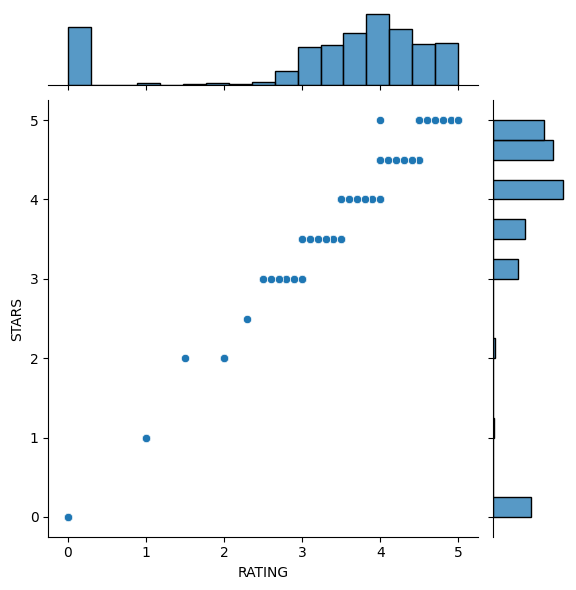

In [78]:
# Tu código aquí ...
# 1. Relación entre la popularidad de una película y su calificación
sns.jointplot(x='RATING', y='STARS', data=fandango, kind='scatter')
plt.show()

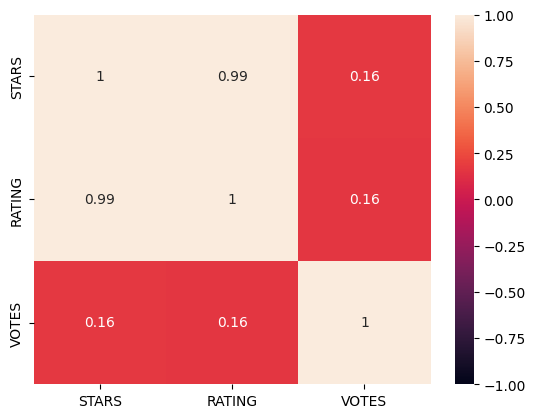

In [79]:
# 2. Correlación entre las distintas variables
sns.heatmap(
    fandango.corr(numeric_only=True), vmin=-1, vmax=1,
    annot=True
)
plt.show()

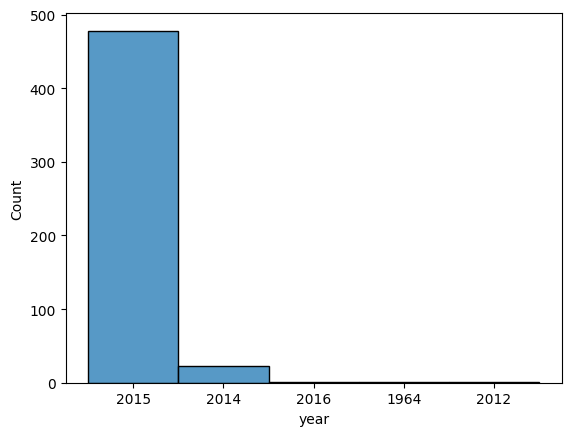

In [80]:
# 3. Calcule cuántas películas hay en Fandango por año y visualice.
fandango['year'] = [movie[-5:-1] for movie in fandango['FILM']]
sns.histplot(x='year', data=fandango)
plt.show()

In [81]:
# 4. Las 10 películas con más votos
display(
    fandango.sort_values(by='VOTES', ascending=False).head(10)
)

,FILM,STARS,RATING,VOTES,year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [82]:
# 5. Cuántas películas tienen cero votos
print(
    f"{len(fandango[fandango['VOTES']==0])} películas no poseen votos."
)

69 películas no poseen votos.


In [83]:
# 6. Creamos una nuevo DataFrame con las películas con al menos una valoración
fandango = fandango[fandango['VOTES']>0]

<font color='green'>Fin actividad 2</font>

### <font color='green'>**Actividad 3**</font>

En un sistema de redondeo normal, un sitio redondearía a la media estrella de valoración más cercana, hacia arriba o hacia abajo. Como se indica en el artículo, el sistema de redondeo de Fandango, y a modo de ejemplo, en el caso de "Ted 2", esperaríamos que la calificación se redondeara a 4 estrellas (dado que la valoración es de usuarios es 4.1). Sin embargo, Fandango redondeó el "ratingValue" hacia arriba, hasta un 4.5. Esto nos demuestra que la calificación real del usuario puede ser ligeramente diferente a la calificación que se le muestra a un usuario en el sitio web.
Visualice esta diferencia en distribuciones.

1. Verifique con gráficos KDE rellenos si las distribuciones de las calificaciones que se muestran (STARS) son distintas a la calificación real de los votos (RATING). Tip: recorte los KDE a 0-5 con
`clip=[0,5]`

2. Si es que en el punto anterior hay una diferencia, cuantifíquela y añádala en una nueva columna del DataFrame. Esta nueva columna debe quedar expresada con un decimal.

3. Grafique la cantidad de veces que cada diferencia (0.1, 0.2, 0.3, etc.) se produce.

4. ¿Qué película(s) tiene(n) un diferencial de más de media estrella?

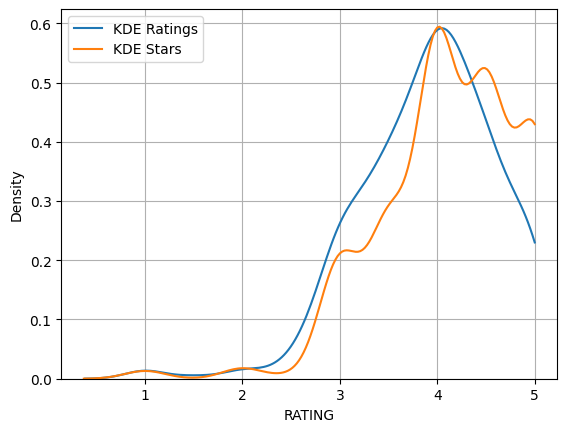

In [84]:
# Tu código aquí ...

sns.kdeplot(x='RATING', data=fandango, clip=[0,5], label='KDE Ratings')
sns.kdeplot(x='STARS', data=fandango, clip=[0,5], label='KDE Stars')
plt.grid()
plt.legend()
plt.show()

In [85]:
# 2. Cuantifiquemos ahora realmente esta discrepancia.
from scipy.stats import gaussian_kde

fandango['Discrepancia kde'] = abs(gaussian_kde(fandango['STARS'])(
    fandango['STARS']) - gaussian_kde(fandango['RATING'])(fandango['RATING'])
).round(1)

fandango['Discrepancia real'] = abs(fandango['STARS'] - fandango['RATING'])

fandango.head()

,FILM,STARS,RATING,VOTES,year,Discrepancia kde,Discrepancia real
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.0,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.1,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.1,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.1,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.1,0.0


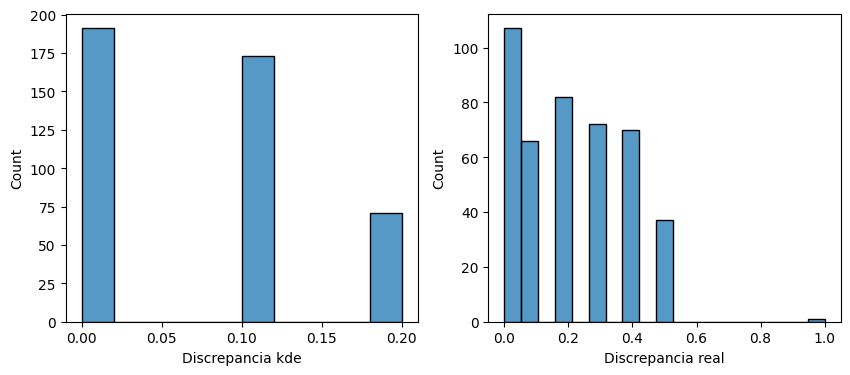

In [90]:
# 3. Cantidad de veces que las diferencias se producen.
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(x='Discrepancia kde', data=fandango, ax=axs[0])

sns.histplot(x='Discrepancia real', data=fandango, ax=axs[1])

plt.show()

In [92]:
# 4. Buscamos la pelicula con una diferencia de una estrella
print(
    f"La(s) película(s) con una estrella de diferencia real es(son):\n"
)
for peli in fandango[fandango['Discrepancia real']==1]['FILM']:
    print(peli,end='\n')

La(s) película(s) con una estrella de diferencia real es(son):

Turbo Kid (2015)


<font color='green'>Fin actividad 3</font>

### <font color='green'>**Actividad 4**</font>
## Comparación de las valoraciones de Fandango con Rotten Tomatoes

Compare las valoraciones de Fandango con la de __Rotten Tomatoes__. Analice y comente las diferencias.

1. Analice __Rotten Tomatoes__ (__RT__). Observe cómo el sitio tiene dos valoraciones; una de críticos especializados y otra de usuarios. Realice una visualización de dispersión de ambas variables.

2. Determine la diferencia comparando las calificaciones de los críticos y las calificaciones de los usuarios de __RT__. Cree una nueva columna basada en la diferencia entre las calificaciones de los críticos y las calificaciones de los usuarios para Rotten Tomatoes. Calcule esto con `RottenTomatoes - RottenTomatoes_User`

3. Calcule la diferencia media absoluta obtenida en el punto 2. Atención con los valores negativos.

4. Visualice con 2 subplots horizontales:
  * La distribución de las diferencias entre `RT Critics Score` y `RT User Score`. Debe haber valores negativos en esta gráfica de distribución. Utilice KDE e histogramas para mostrar esta distribución.
  * La distribución que muestre la diferencia en valor absoluto.
  * Incluya un título a cada subplot y un título general a nivel del lienzo (figure).

5. ¿Cuáles son las 10 películas más valoradas por los usuarios en promedio que los críticos? Y ¿Cuáles son las 10 películas con mejores valoraciones de críticos de películas que de usuarios?

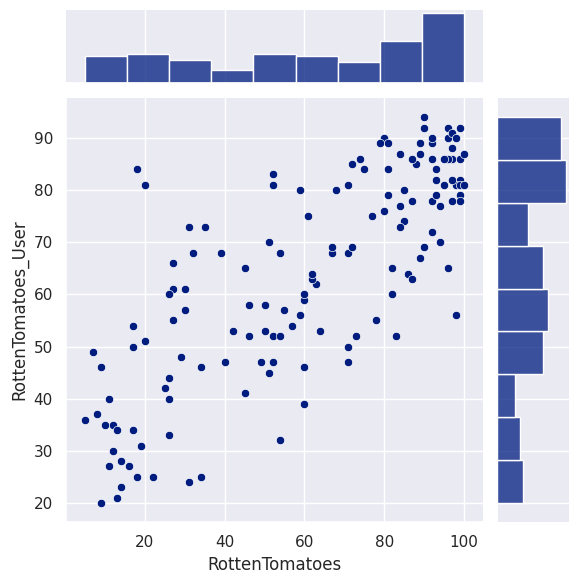

In [98]:
# Tu código aquí ...

# 1. Dispersión de RT
sns.set(context='notebook', style='darkgrid', palette='dark')
sns.jointplot(x='RottenTomatoes', y='RottenTomatoes_User', data=all_sites)
plt.show()

In [99]:
# 2. Rotten_Diff =  Critics - User Score.
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites[
    'RottenTomatoes_User']
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [101]:
# 3. Diferencia media absoluta
print(
    f"La diferencia media absoluta es {abs(all_sites['Rotten_Diff']).mean():.2f}"
)

La diferencia media absoluta es 15.10


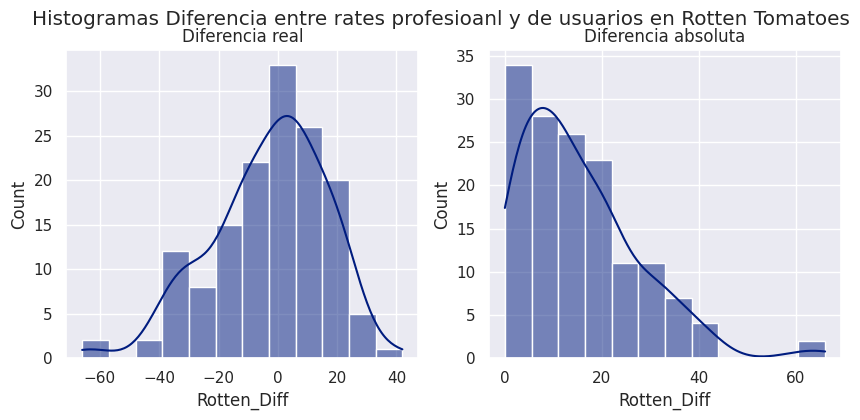

In [109]:
# 4. Visualización de la distribución de las diferencias y del valor absoluto de las diferencias

fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(x='Rotten_Diff', data=all_sites, ax=axs[0], kde=True)
axs[0].set_title('Diferencia real')
sns.histplot(abs(all_sites['Rotten_Diff']), ax=axs[1], kde=True)
axs[1].set_title('Diferencia absoluta')
fig.suptitle(
    'Histogramas Diferencia entre rates profesioanl y de usuarios '+\
    'en Rotten Tomatoes'
    )
plt.show()

In [118]:
# 5. Las 10 películas más valoradas por los usuarios en promedio que los críticos
display(
    all_sites.sort_values(by='Rotten_Diff').head(10)
)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39
132,Max (2015),35,73,47,5.9,7.0,15,5444,-38
19,Pixels (2015),17,54,27,5.3,5.6,246,19521,-37
15,Taken 3 (2015),9,46,26,4.6,6.1,240,104235,-37
51,Entourage (2015),32,68,38,5.2,7.1,96,21914,-36
49,Terminator Genisys (2015),26,60,38,6.4,6.9,779,85585,-34


In [116]:
# Las 10 películas con mejores valoraciones de críticos de películas que de usuarios
display(
    all_sites.sort_values(by='Rotten_Diff', ascending=False).head(10)
)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
145,"Kumiko, The Treasure Hunter (2015)",87,63,68,6.4,6.7,19,5289,24
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24
90,The SpongeBob Movie: Sponge Out of Water (2015),78,55,62,6.5,6.1,196,26046,23
7,Top Five (2014),86,64,81,6.8,6.5,124,16876,22
11,Black Sea (2015),82,60,62,6.6,6.4,37,16547,22
116,Clouds of Sils Maria (2015),89,67,78,7.1,6.8,36,11392,22


<font color='green'>Fin actividad 4</font>

### <font color='green'>**Actividad 5**</font>
## Comparación de las valoraciones de Fandango con MetaCritic

Ahora echemos un vistazo a las calificaciones de __MetaCritic__. Metacritic también muestra una calificación de usuario promedio en comparación con su calificación oficial mostrada.

1. Realice una visualización de dispersión de ambas variables.

2. Determine la diferencia comparando las calificaciones de los críticos y las calificaciones de los usuarios de __RT__. De forma similar a la __Actividad 4__ cree una nueva columna basada en la diferencia entre las calificaciones de los críticos y las calificaciones de los usuarios para MetaCritic. Calcule esto con `Metacritic - Metacritic_User`

3. Visualice las comparación de diferencias de __RT__ con las de __MetaCritic__.

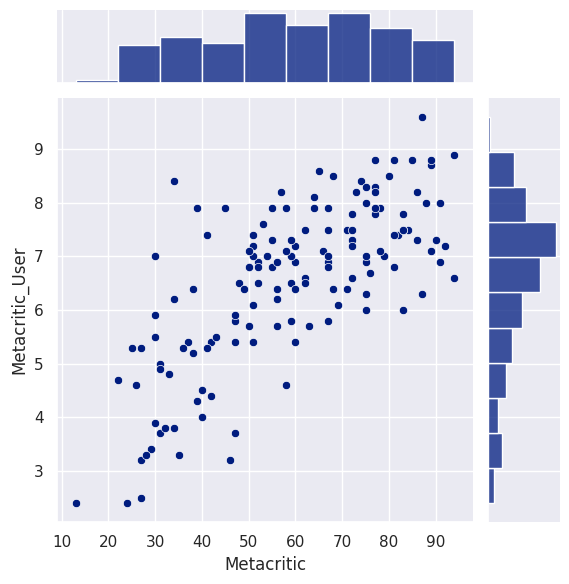

In [119]:
# Tu código aquí ...
# 1. Visualización de dispersión (scatter) entre la crítica oficial y la de los usuarios
sns.jointplot(x='Metacritic', y='Metacritic_User', data=all_sites)
plt.show()

In [123]:
# 2. Metacritic_Diff =  Criticos - Usuarios
all_sites['Metacritic_Diff'] = all_sites['Metacritic'] - 10*all_sites[
    'Metacritic_User']
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Metacritic_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,-5.0
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,-8.0
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,-17.0
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,-25.0
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,-5.0


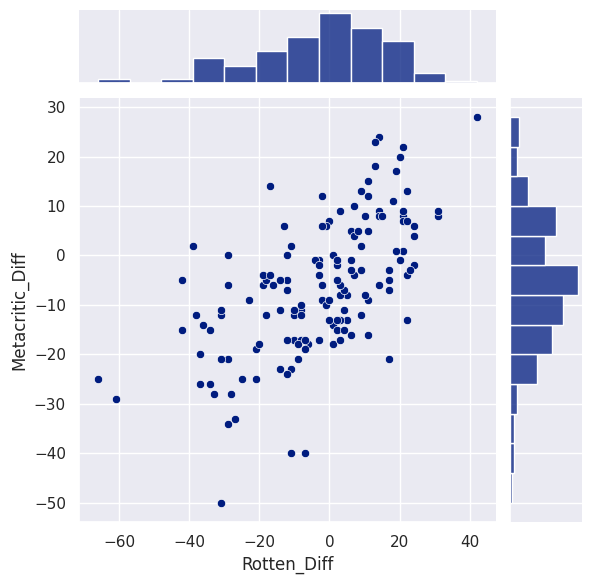

In [124]:
# 3. Dispersión de diferencias
sns.jointplot(x='Rotten_Diff', y='Metacritic_Diff', data=all_sites)
plt.show()

<font color='green'>Fin actividad 5</font>

### <font color='green'>**Actividad 6**</font>
## Comparación de valoraciones de Fandago vs. All Sites

Explore si Fandango muestra artificialmente calificaciones más altas que las justificadas para impulsar la venta de boletos.

1. Combine ambos datasets (`Fandango` con `All_Sites`). ¿Cuántos registros se pierden en la fusión?
2. Normalice las columnas para que sus escalas sean comparables. Fandango utiliza una escala de $0-5$ para `STARS` y `RATINGS`.
3. Simplifique el DataFrame. Genere una copia con las valoraciones normalizadas. Incluya `STARS`y `RATING` desde Fandango.
4. Compare de la distribución de puntuaciones entre sitios. ¿Fandango muestra calificaciones anormalmente altas? Ya sabemos que su `RATIBG` mostrado es más alto que las valoraciones de usuarios (`STARS`), pero ¿son las calificaciones en sí mismas más altas que el promedio? Analice y comente.
5. Cree una gráfica `hisplot` comparando todas las puntuaciones normalizadas.
6. ¿Cómo se califican las peores películas en todos los sitios? Cree una visualización del tipo `clustermap` de todas las puntuaciones normalizadas. Investigue acerca de esta gráfica avanzada de `Seaborn`.
7. Según las calificaciones de los críticos de __RT__, ¿cuáles son las 10 películas con las calificaciones más bajas? ¿Cuáles son las puntuaciones normalizadas en los otros sitios para estas películas?

In [129]:
# Tu código aquí ...
# 1. Merge de ambos datasets
# No todas las películas de la tabla Fandango están en la tabla All_Sites
# algunas películas de Fandango tienen muy pocas críticas o ninguna.
# Solo queremos comparar películas que están en ambos DataFrames,
merged = fandango.merge(all_sites, on='FILM', how='inner')
print(
    f"En el proceso de merge se pierden {len(fandango)-len(merged)} elementos"
    f" de Fandango y {len(all_sites)-len(merged)} elementos de los demás sitios."
)

En el proceso de merge se pierden 290 elementos de Fandango y 1 elementos de los demás sitios.


Tenga en cuenta que RT, Metacritic e IMDB no usan una puntuación entre 0-5 estrellas como lo hace Fandango. Para hacer una comparación justa, necesitamos * normalizar * estos valores para que todos caigan entre 0 y 5 estrellas y la relación entre las reseñas se mantenga igual.


Tips:
1. https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

2. Otra forma simple de normalizar es dividiendo las escalas para asemejarlas a la de Fandango.
  * 100/20 = 5
  * 10/2 = 5

In [133]:
# 2. Normalización de las valoraciones
merged = fandango.merge(all_sites, on='FILM', how='inner')
merged['STARS'] = 20*merged['STARS']
merged['Metacritic_User'] = 10*merged['Metacritic_User']
merged['IMDB'] = 10*merged['IMDB']
merged['RATING'] = 20*merged['RATING']
display(merged.head())

,FILM,STARS,RATING,VOTES,year,Discrepancia kde,Discrepancia real,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Metacritic_Diff
0,Fifty Shades of Grey (2015),80.0,78.0,34846,2015,0.0,0.1,25,42,46,32.0,42.0,778,179506,-17,14.0
1,Jurassic World (2015),90.0,90.0,34390,2015,0.1,0.0,71,81,59,70.0,73.0,1281,241807,-10,-11.0
2,American Sniper (2015),100.0,96.0,34085,2015,0.1,0.2,72,85,72,66.0,74.0,850,251856,-13,6.0
3,Furious 7 (2015),100.0,96.0,33538,2015,0.1,0.2,81,84,67,68.0,74.0,764,207211,-3,-1.0
4,Inside Out (2015),90.0,90.0,15749,2015,0.1,0.0,98,90,94,89.0,86.0,807,96252,8,5.0


In [136]:
# 3. Simplificación del DataFrame
merged = merged[['FILM', 'STARS', 'RATING', 'RottenTomatoes',
                 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User',
                 'IMDB']]
merged.sample(10)

,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
102,Child 44 (2015),80.0,74.0,26,44,41,53.0,64.0
127,The 100-Year-Old Man Who Climbed Out the Windo...,80.0,78.0,67,69,58,46.0,71.0
9,Into the Woods (2014),70.0,68.0,71,50,69,61.0,60.0
83,Sinister 2 (2015),70.0,66.0,13,34,31,50.0,55.0
5,The Hobbit: The Battle of the Five Armies (2014),90.0,86.0,61,75,59,70.0,75.0
124,Song of the Sea (2014),90.0,86.0,99,92,86,82.0,82.0
76,Still Alice (2015),90.0,82.0,88,85,72,78.0,75.0
11,Ant-Man (2015),100.0,90.0,80,90,64,81.0,78.0
73,Self/less (2015),80.0,76.0,20,51,34,84.0,66.0
8,Avengers: Age of Ultron (2015),100.0,90.0,74,86,66,71.0,78.0


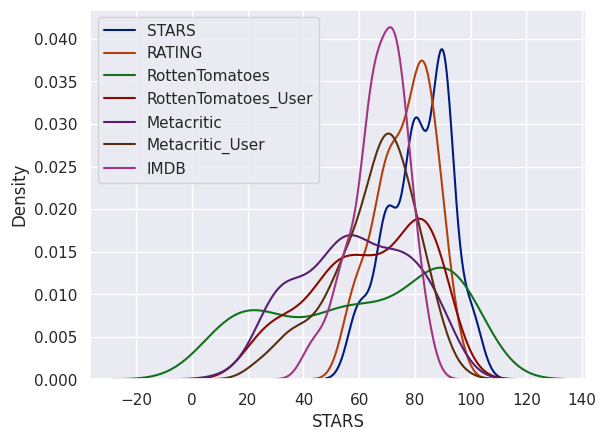

In [139]:
# 4. Comparando distribuciones de valoraciones
for i in merged.columns[1:]:
    sns.kdeplot(x=i, data=merged, label=i)
plt.legend()
plt.show()

Se puede ver que la media en la densidad de las calificaciones de Fandango en efecto si es más alta que las calificaciones en el resto de los sitios.

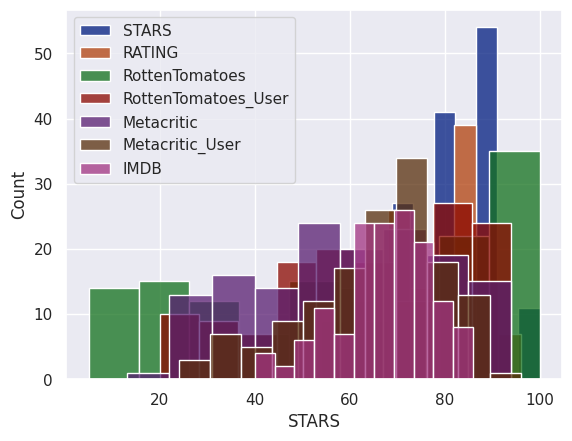

In [142]:
# 5. Hisplot comparando todas las puntuaciones normalizadas.
for i in merged.columns[1:]:
    sns.histplot(x=i, data=merged, label=i)
plt.legend()
plt.show()

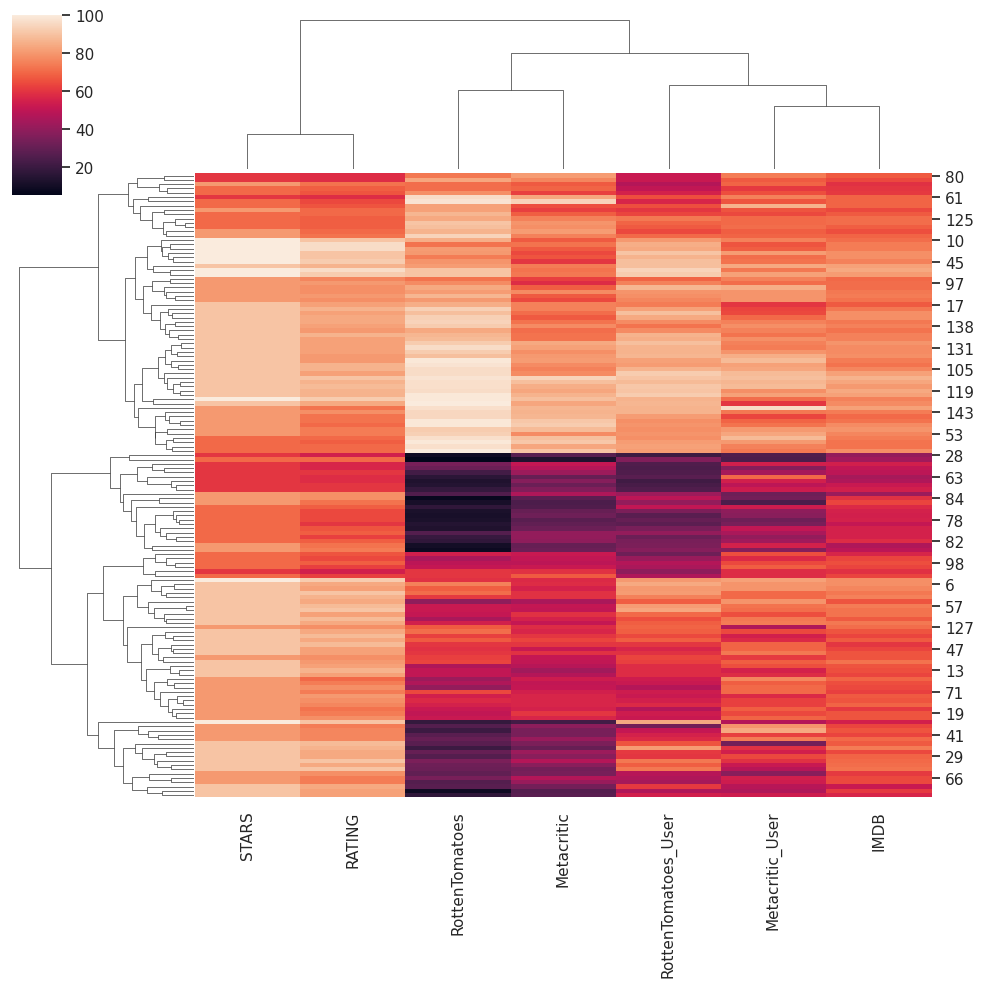

In [144]:
# 6. clustermap
# Las películas de alta calificación
# deben agruparse en comparación con las películas de baja calificación.
sns.clustermap(merged.select_dtypes((int, float)))
plt.show()

In [145]:
# 7. Examinemos las 10 peores películas.
display(
        merged.sort_values(by='RottenTomatoes').head(10)
)

,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
49,Paul Blart: Mall Cop 2 (2015),70.0,70.0,5,36,13,24.0,43.0
84,Hitman: Agent 47 (2015),80.0,78.0,7,49,28,33.0,59.0
54,Hot Pursuit (2015),80.0,74.0,8,37,31,37.0,49.0
25,Taken 3 (2015),90.0,82.0,9,46,26,46.0,61.0
28,Fantastic Four (2015),60.0,54.0,9,20,27,25.0,40.0
50,The Boy Next Door (2015),80.0,72.0,10,35,30,55.0,46.0
88,The Loft (2015),80.0,72.0,11,40,24,24.0,63.0
87,Unfinished Business (2015),70.0,64.0,11,27,32,38.0,54.0
78,Mortdecai (2015),70.0,64.0,12,30,27,32.0,55.0
77,Seventh Son (2015),70.0,64.0,12,35,30,39.0,55.0


<font color='green'>Fin actividad 6</font>